<a href="https://colab.research.google.com/github/RushilPatel0703/ACML_Project/blob/rushil/ACML_Project_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [3]:
# for importing data that is already on github
url = 'https://raw.githubusercontent.com/RushilPatel0703/ACML_Project/main/data.csv'
data = pd.read_csv(url)

In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
X = data.drop('Bankrupt?',axis=1)
y = data['Bankrupt?']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
clf1 = RandomForestClassifier(n_estimators = 150) 
clf2 = RandomForestClassifier(n_estimators = 150,criterion='entropy',max_features='auto') 
clf3 = RandomForestClassifier(n_estimators = 150,criterion='entropy') 

In [8]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [9]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

In [10]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred1))
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred2))
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred3))

ACCURACY OF THE MODEL:  0.9618768328445748
ACCURACY OF THE MODEL:  0.9633431085043989
ACCURACY OF THE MODEL:  0.9648093841642229


In [ ]:
estimators = [10,50,60,90,100,150,200,250,300,400]

In [ ]:
accuracy1 = []
accuracy2 = []
accuracy3 = []

In [ ]:
for i in range(0,10):
    clf_loop1 = RandomForestClassifier(n_estimators = estimators[i])
    clf_loop1.fit(X_train, y_train)
    y_pred_loop1 = clf_loop1.predict(X_test)
    accuracy1.append(metrics.accuracy_score(y_test, y_pred_loop1))

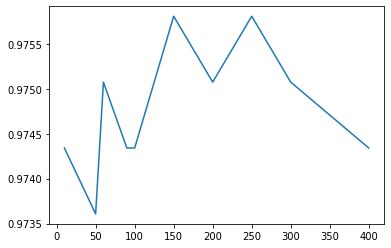

In [ ]:
plt.plot(estimators,accuracy1)

In [ ]:
for i in range(0,10):
    clf_loop2 = RandomForestClassifier(n_estimators = estimators[i],criterion='entropy')
    clf_loop2.fit(X_train, y_train)
    y_pred_loop2 = clf_loop2.predict(X_test)
    accuracy2.append(metrics.accuracy_score(y_test, y_pred_loop2))

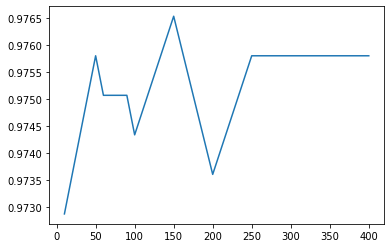

In [ ]:
plt.plot(estimators,accuracy2)

In [ ]:
for i in range(0,10):
    clf_loop3 = RandomForestClassifier(n_estimators = estimators[i],criterion='entropy',max_features='auto')
    clf_loop3.fit(X_train, y_train)
    y_pred_loop3 = clf_loop3.predict(X_test)
    accuracy3.append(metrics.accuracy_score(y_test, y_pred_loop3))

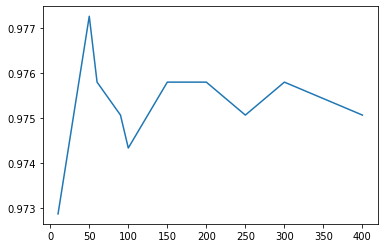

In [ ]:
plt.plot(estimators,accuracy3)

In [ ]:
accuracy4 = []

In [ ]:
for i in range(0,10):
    clf_loop4 = RandomForestClassifier(n_estimators = estimators[i],criterion='gini')
    clf_loop4.fit(X_train, y_train)
    y_pred_loop4 = clf_loop4.predict(X_test)
    accuracy4.append(metrics.accuracy_score(y_test, y_pred_loop4))

In [ ]:
accuracy5 = []

In [ ]:
for i in range(0,10):
    clf_loop5 = RandomForestClassifier(n_estimators = estimators[i],criterion='gini',max_features='auto')
    clf_loop5.fit(X_train, y_train)
    y_pred_loop5 = clf_loop5.predict(X_test)
    accuracy5.append(metrics.accuracy_score(y_test, y_pred_loop5))

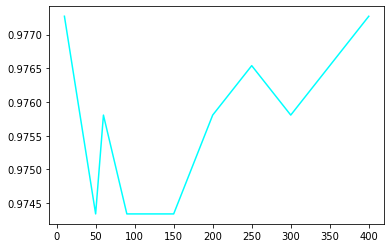

In [ ]:
plt.plot(estimators,accuracy5,color='aqua')

In [ ]:
accuracy6 = []

In [ ]:
for i in range(0,10):
    clf_loop6 = RandomForestClassifier(n_estimators = estimators[i],criterion='gini',max_features='log2')
    clf_loop6.fit(X_train, y_train)
    y_pred_loop6 = clf_loop6.predict(X_test)
    accuracy6.append(metrics.accuracy_score(y_test, y_pred_loop6))

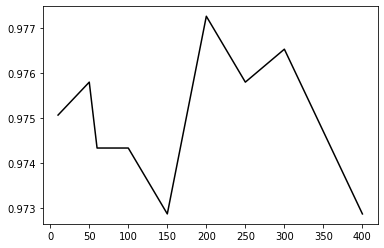

In [ ]:
plt.plot(estimators,accuracy6,color='black')

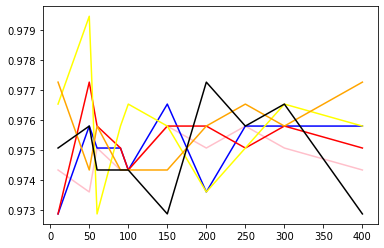

In [ ]:
accuracy7 = []

In [ ]:
for i in range(0,10):
    clf_loop7 = RandomForestClassifier(n_estimators = estimators[i],criterion='entropy',max_features='log2')
    clf_loop7.fit(X_train, y_train)
    y_pred_loop7 = clf_loop7.predict(X_test)
    accuracy7.append(metrics.accuracy_score(y_test, y_pred_loop7))

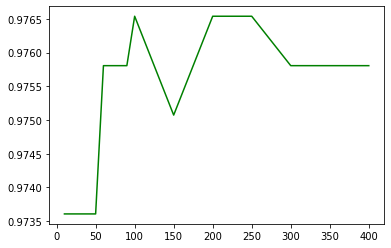

In [ ]:
plt.plot(estimators,accuracy7,color='green')

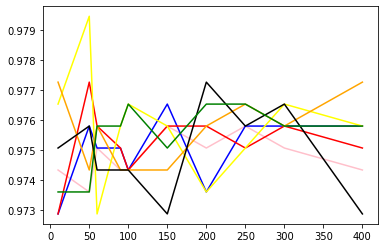

In [ ]:
plt.plot(estimators,accuracy1,color='pink')
plt.plot(estimators,accuracy2,color='blue')
plt.plot(estimators,accuracy3,color='red')
plt.plot(estimators,accuracy4,color='yellow')
plt.plot(estimators,accuracy5,color='orange')
plt.plot(estimators,accuracy6,color='black')
plt.plot(estimators,accuracy7,color='green')

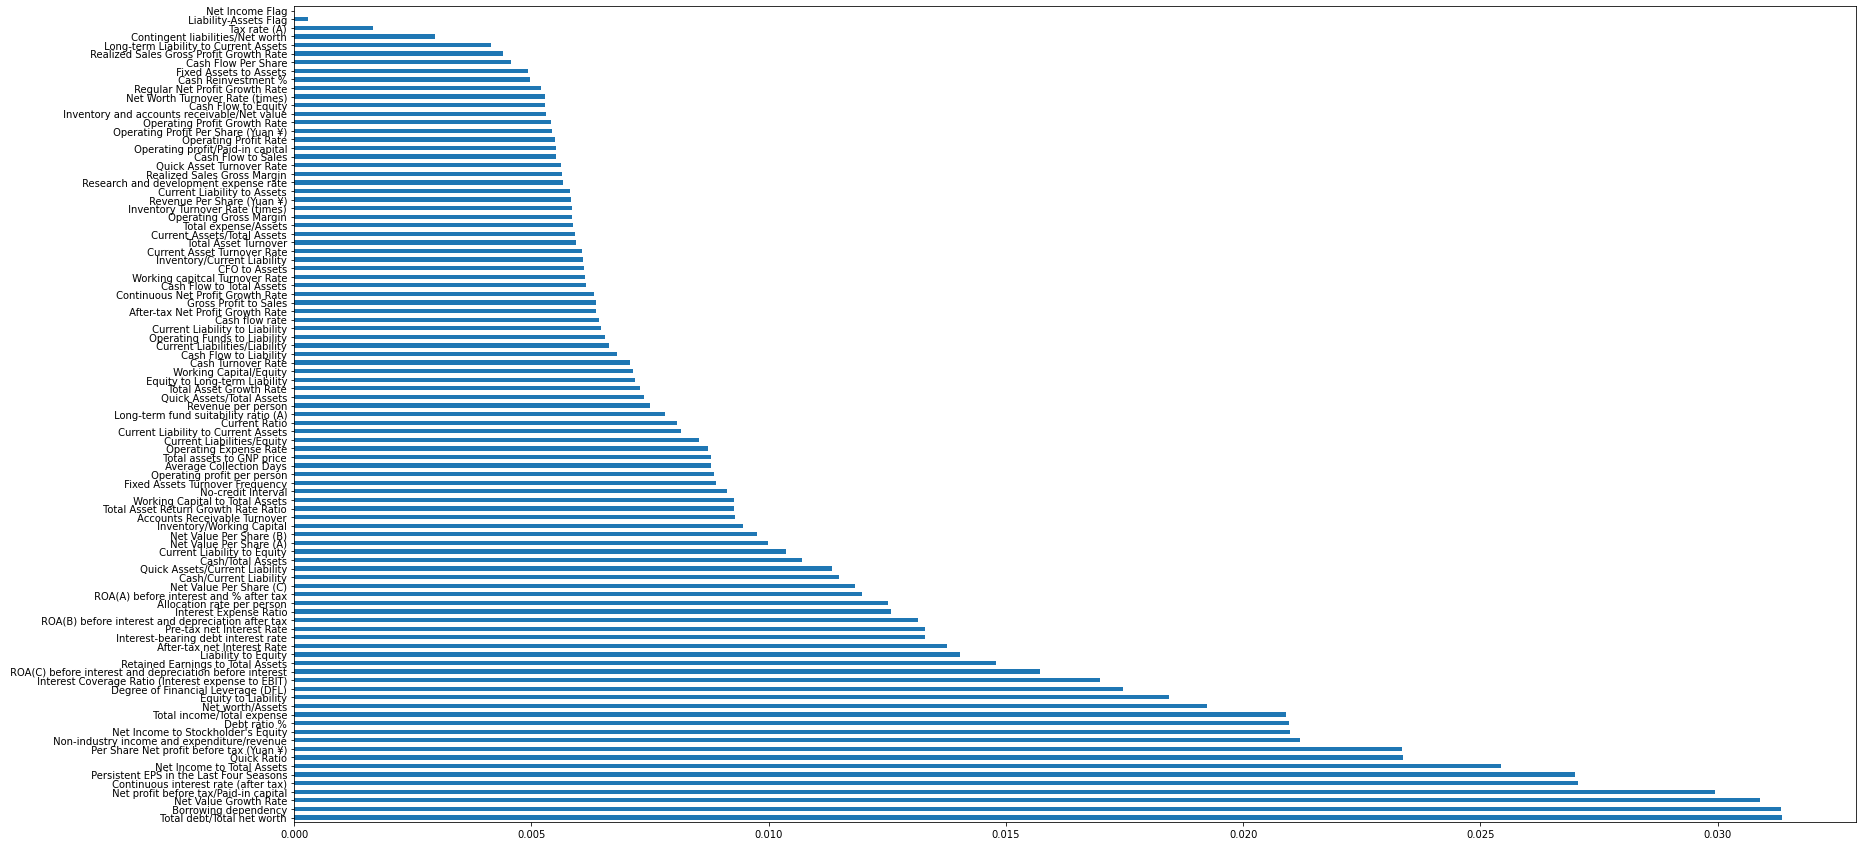

In [17]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
feature_imp = pd.Series(clf2.feature_importances_, index = data.columns[1:]).sort_values(ascending = False)
feature_imp.plot(kind='barh')
plt.rcParams["figure.figsize"] = (28,15)